# Assignment-3

## Application 1: Chemistry

(i) Water vapour splits into Oxygen and Hydrogen at
higher temperature as 

> $2H$<sub>$2$</sub>$O$ $->$ $2H$<sub>$2$</sub> + $O$<sub>$2$</sub>

The model for the _reaction rate_ `r` and _mole fraction_ `f` of
$H$<sub>$2$</sub>$O$ is given by

> $r$ $=$ $R$<sub>$2$</sub>/$R$<sub>$1$</sub> 

,with concentrations $R$<sub>$1$</sub> = \[$H$<sub>$2$</sub>$O$\]<sup>$2$</sup>
, $R$<sub>$2$</sub> = \[$H$<sub>$2$</sub>\]<sup>$2$</sup>\[$O$<sub>$2$</sub>\] and

> $k$ = $f/(1-f)$ $\sqrt{2p/(2+f)}$

where $k$ $=$ $0.04$ is a given reaction equilibrium constant
and $p$ $=$ $3.5atm$ is the total pressure at some temperature $T$.

> $F$ $=$ $F(f)$ $=$ $0.04$ $-$ $f/(1-f)$ $\sqrt{7/(2+f)}$ $=$ $0$

The Newton’s method for $F$ is
> $f$<sub>$i+1$</sub> $=$ $f$<sub>$i$</sub> $-$ $F$($f$<sub>$i$</sub>)/$F$’($f$<sub>$i$</sub>) , $i=0,1,2…$



*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration-1, f = 0.0261640 and F(f) = -0.0099378
Error: 0.07383601801821446
Iteration-2, f = 0.0210614 and F(f) = -0.0000397
Error: 0.005102597757632291
Iteration-3, f = 0.0210408 and F(f) = -0.0000000
Error: 2.0543113484122744e-05

Required root is: 0.02104084


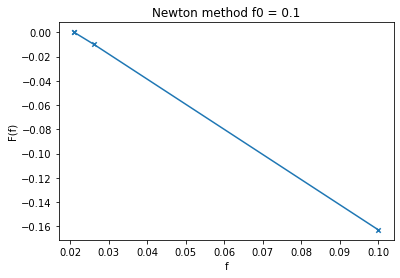

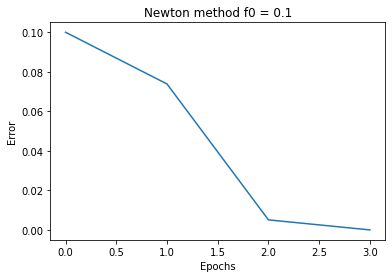

In [5]:
import math
import numpy
import matplotlib.pyplot as plt

def F(f):
    return (0.04 - (f/(1-f))*(math.sqrt(7/(2+f))))

def dF(f):
    return -1 * ((1.32288 * (f ** 2) + 1.32288 * f + 5.2915)/(((f-1) ** 2) * ((f+2) ** 1.5)))

def newtonRaphson(x0, e, N):
    print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    step = 1
    flag = 1
    condition = True
    while condition:
        if dF(x0) == 0.0:
            print('Divide by zero error!')
            break

        prev_x0 = x0
        x1 = x0 - F(x0)/dF(x0)
        print('Iteration-%d, f = %0.7f and F(f) = %0.7f' % (step, x1, F(x1)))
        epochs.append(step)
        x1_val.append(x1)
        fx_val.append(F(x1))

        x0 = x1
        step = step + 1

        if step > N:
            flag = 0
            break

        # uncomment this if you want function value to be within error
        # condition = abs(f(x1)) > e
        print(f'Error: {abs(x1 - prev_x0)}')

        error_val.append(abs(x1 - prev_x0))

        # here, root value is considered for error
        condition = abs(x1 - prev_x0) > e and F(x1) != 0 and abs(F(x1)) > e

    if flag == 1:
        print('\nRequired root is: %0.8f' % x1)
    else:
        print('\nNot Convergent.')


# Initial guess
x0 = 0.1
# Error
e = 1e-6
# Max iterations
N = 10

epochs = []
x1_val = []
fx_val = []
error_val = []

x1_val.append(x0)
fx_val.append(F(x0))
error_val.append(x0)
epochs.append(0)

# Starting Newton Raphson Method
newtonRaphson(x0, e, N)

plt.scatter(x1_val, fx_val, s=20, marker='x')
plt.plot(x1_val, fx_val)

# naming the x axis
plt.xlabel('f')
# naming the y axis
plt.ylabel('F(f)')
# giving a title to my graph
plt.title(f'Newton method f0 = {x0}')

plt.figure()
plt.plot(epochs, error_val)
plt.title(f'Newton method f0 = {x0}')
plt.xlabel('Epochs')
plt.ylabel('Error')

plt.show()

(ii) The model below can be used to estimate _Oxygen level_ `c` $(mg/l)$ in a river downstream from a sewage discharge

> $C$ $=$ $10$ - $20$ x $(e$<sup>$-0.15x$</sup> $-$ $e$<sup>$-0.5x$</sup>$)$

The derivate of the above equation is:

> $C'$ $=$ $3e$<sup>$-0.15x$</sup> $-$ $10e$<sup>$-0.5x$</sup>

The Newton’s method for $C$ is
> $c$<sub>$i+1$</sub> $=$ $c$<sub>$i$</sub> $-$ $C'$($c$<sub>$i$</sub>)/$C"$(c<sub>$i$</sub>) , $i=0,1,2…$




*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration-1, c = 1.6203319 and C(c) = 3.2110356
Error: 1.520331884429032
Iteration-2, c = 2.7401215 and C(c) = 1.8223335
Error: 1.1197896640560148
Iteration-3, c = 3.3079437 and C(c) = 1.6488725
Error: 0.5678221400744019
Iteration-4, c = 3.4344726 and C(c) = 1.6432644
Error: 0.12652890164895192
Iteration-5, c = 3.4399127 and C(c) = 1.6432551
Error: 0.005440071007107861
Iteration-6, c = 3.4399223 and C(c) = 1.6432551
Error: 9.636828411263565e-06

Required root is: 3.43992230


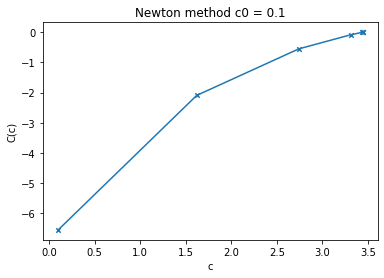

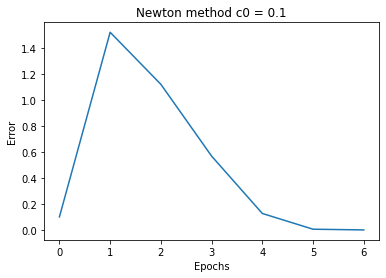

In [6]:
import math
import numpy
import matplotlib.pyplot as plt

def C(x):
    return (10 - 20 * (math.exp(-0.15*x) - math.exp(-0.5*x)))

def dC(x):
    return 3 * math.exp(-0.15*x) - 10 * math.exp(-0.5*x)

def d2C(x):
    return -0.45 * math.exp(-0.15*x) + 5 * math.exp(-0.5*x)

def newtonRaphson(x0, e, N):
    print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    step = 1
    flag = 1
    condition = True
    while condition:
        if d2C(x0) == 0.0:
            print('Divide by zero error!')
            break

        prev_x0 = x0
        x1 = x0 - dC(x0)/d2C(x0)
        print('Iteration-%d, c = %0.7f and C(c) = %0.7f' % (step, x1, C(x1)))
        epochs.append(step)
        x1_val.append(x1)
        fx_val.append(dC(x1))

        x0 = x1
        print(f'Error: {abs(x1 - prev_x0)}')
        step = step + 1

        if step > N:
            flag = 0
            break

        # uncomment this if you want function value to be within error
        # condition = abs(f(x1)) > e

        error_val.append(abs(x1 - prev_x0))

        # here, root value is considered for error
        condition = abs(x1 - prev_x0) > e and dC(x1) != 0 and abs(dC(x1)) > e

    if flag == 1:
        print('\nRequired root is: %0.8f' % x1)
    else:
        print('\nNot Convergent.')


# Initial guess
x0 = 0.1
# Error
e = 1e-6
# Max iterations
N = 10

epochs = []
x1_val = []
fx_val = []
error_val = []

x1_val.append(x0)
fx_val.append(dC(x0))
error_val.append(x0)
epochs.append(0)

# Starting Newton Raphson Method
newtonRaphson(x0, e, N)

plt.scatter(x1_val, fx_val, s=20, marker='x')
plt.plot(x1_val, fx_val)

# naming the x axis
plt.xlabel('c')
# naming the y axis
plt.ylabel('C(c)')
# giving a title to my graph
plt.title(f'Newton method c0 = {x0}')

plt.figure()
plt.plot(epochs, error_val)
plt.title(f'Newton method c0 = {x0}')
plt.xlabel('Epochs')
plt.ylabel('Error')

plt.show()

## Application 2: Digital Image Processing

Edge detection using first derivative

> $Forward$ $difference$ $=$ $\Delta$<sub>+</sub> $=$ $f(x + h) - f(x)$

Consider an image I.
Let $\delta$I/$\delta$x be the gradient along x-direction (`dx`) and $\delta$I/$\delta$y be the gradient along y-direction (`dy`).

> $Magnitude$ $of$ $gradient$, $G$ $=$ $\sqrt{(dx^2 + dy^2)}$

In [7]:
from PIL import Image
import numpy as np
import math

img = Image.open('./cameraman.tif')

w, h = img.size

H = 1

I = np.empty(shape=(w, h))
I.fill(0)

dx = np.empty(shape=(w, h))
dx.fill(0)

dy = np.empty(shape=(w, h))
dy.fill(0)

edge = np.empty(shape=(w, h))
edge.fill(0)

for i in range(w):
    for j in range(h):
        I[i, j] = img.getpixel((j, i))

original_img = Image.fromarray(I)
original_img.show()

for i in range(w-1):
    for j in range(h-1):
        dx[i, j] = I[i, j+H] - I[i, j]

grad_x = Image.fromarray(dx)
grad_x.show()

for i in range(w-1):
    for j in range(h-1):
        dy[i, j] = I[i+H, j] - I[i, j]

grad_y = Image.fromarray(dy)
grad_y.show()

for i in range(w-1):
    for j in range(h-1):
        edge[i, j] = math.sqrt((dx[i, j]) ** 2 + (dy[i, j]) ** 2)

detected_edges = Image.fromarray(edge)
detected_edges.show()

new_I = img.convert("L")
new_grad_x = grad_x.convert("L")
new_grad_y = grad_y.convert("L")
new_detected_edges = detected_edges.convert("L")

new_I.save('original-image.png')
new_grad_x.save('forward-diff-x.png')
new_grad_y.save('forward-diff-y.png')
new_detected_edges.save('detected-edges.png')

## Application 3: Machine Learning

Regression (using Principles of Least Squares)

* Linear: 
> $y$ $=$ $b$<sub>$0$</sub> $+$ $b$<sub>$1$</sub>$x$

* Non-linear
> $y$ $=$ $b$<sub>$0$</sub> $+$ $b$<sub>$1$</sub>$x$ $+$ $b$<sub>$2$</sub>$x^2$

Data to be fit:

![](./regression.png)

Linear regression (b0 + b1*(x))

Error: 7.490558403882518
Coefficient of b1: 61.272186542109324, b0: -39.061955918841775

Non-Linear regression (b0 + b1*(x) + b2*(x^2))

Error: 0.759549208792465
Coefficient of b2: 61.96032544689352, b1: -143.16202287935963, b0: 128.81280359043572


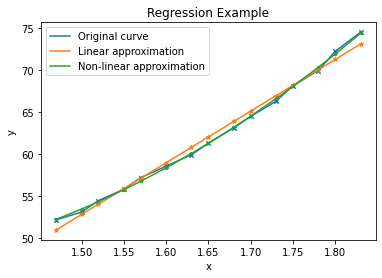

In [8]:
import numpy as np
from math import log
import matplotlib.pyplot as plt

def curve_fit(x, y, deg=1):
    """
    Arguments
    ---------
    x: numpy.array
        x values
    y: numpy.array
        y value
    deg: int
        Degree of interpolated polynomial

    Returns
    -------
    np.array:
        Returns coefficients of polynomial
        [Starting from highest degree]
    """
    n = deg+1
    X = np.zeros((n, n))
    Y = np.zeros(n)

    # Initialize X
    for i in range(0, n):
        for j in range(0, n):
            X[i][j] = np.sum(x**(i+j))

    # Initialize Y
    for i in range(0, n):
        Y[i] = np.sum(y*x**(i))

    A = np.linalg.solve(X, Y)

    # compute error
    error = 0
    for i in range(len(x)):
        polyval = 0
        for j in range(0, len(A)):
            polyval += A[j]*(x[i])**j
        # print('polyval',polyval)
        error += (y[i] - polyval)**2
    print('Error:', error)

    A = np.flip(A)
    return A

x = np.array([1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83])
y = np.array([52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46])

# linear

deg = 1

print('Linear regression (b0 + b1*(x))\n')
A = curve_fit(x, y, deg)
print(f'Coefficient of b1: {A[0]}, b0: {A[1]}')

y_1 = []

for i in x:
    y_1.append(A[1] + A[0] * i)

# non-linear

deg = 2

print('\nNon-Linear regression (b0 + b1*(x) + b2*(x^2))\n')
A = curve_fit(x, y, deg)
print(f'Coefficient of b2: {A[0]}, b1: {A[1]}, b0: {A[2]}')

y_2 = []

for i in x:
    y_2.append(A[2] + A[1] * i + A[0] * i ** 2)

plt.scatter(x, y, s=20, marker='x')
plt.plot(x, y, label='Original curve')

plt.scatter(x, y_1, s=20, marker='*')
plt.plot(x, y_1, label='Linear approximation')

plt.scatter(x, y_2, s=20, marker='.')
plt.plot(x, y_2, label='Non-linear approximation')

# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('y')
# giving a title to my graph
plt.title('Regression Example')
plt.legend()
plt.show()